In [12]:
from plotly import graph_objects as go
import plotly.express as px
from rich import print as rprint

In [13]:
building_w = 80 # m
building_d = 25 # m
building_h = 20 # m
no_stories = 5 # amount

In [14]:
building = {
    'nodes_floor': [[0, 0], [building_w, 0], [building_w, building_d], [0, building_d]], # [i, j] nodes ground level
    'edges_floor': [[0, 1], [1, 2], [2, 3], [3, 0]] # [i, j] meaning nodes ground level
}

In [15]:
core_1 = {
    'nodes_floor': [[10, 10], [15, 10], [10, 20]], # [i, j] nodes ground level
    'edges_floor': [[0, 1], [1, 2]] # [i, j] meaning nodes ground level
}
core_2 = {
    'nodes_floor': [[30, 10], [35, 10], [30, 20]], # [i, j] nodes ground level
    'edges_floor': [[0, 1], [1, 2]] # [i, j] meaning nodes ground level
}
cores = [core_1, core_2]  

In [16]:
# def add_roof_faces(nodes, edges):
#     """
#     """
#     start_roof_idx = int(len(nodes) / 2)
#     roof_faces = [[edges[0][0] + start_roof_idx, edges[1][0] + start_roof_idx, edges[2][0] + start_roof_idx]]
#     roof_faces.append([edges[0][0] + start_roof_idx, edges[2][0] + start_roof_idx, edges[3][0] + start_roof_idx])
#     return roof_faces

In [17]:
# def convert_geom_definition(geom_floor, building_h):
#     """
#     """
#     nodes_floor = geom_floor['nodes_floor']
#     edges_floor = geom_floor['edges_floor']
        
#     # Add height to node coordinates
#     nodes = [node_floor + [0] for node_floor in nodes_floor]
#     nodes += [node_floor + [building_h] for node_floor in nodes_floor]
    
#     # Define edges 3d
#     start_roof_idx = int(len(nodes) / 2)
#     # Horizontal edges
#     edges = edges_floor + [[x + start_roof_idx, y + start_roof_idx] for x, y in edges_floor]
#     # Vertical edges
#     edges += [[idx, idx + start_roof_idx] for idx, node in enumerate(nodes_floor)]
    
#     faces = []
#     for edge in geom_floor['edges_floor']:
#         faces.append(edge + [edge[0] + start_roof_idx])
#         faces.append([edge[0] + start_roof_idx, edge[1] + start_roof_idx, edge[1]])
#     return (nodes, edges, faces)

In [18]:
def plot_item_contour(fig, nodes, edges, color: str='rgb(0, 0, 255)', line_width: int=2, marker_size: int =2):
    """
    """
    for i_node, j_node in edges:
        x_coord_i, y_coord_i, z_coord_i = nodes[i_node]
        x_coord_j, y_coord_j, z_coord_j = nodes[j_node]

        trace = go.Scatter3d(
            x = [x_coord_i, x_coord_j],
            y = [y_coord_i, y_coord_j],
            z = [z_coord_i, z_coord_j],
            line = {
                'color': color,
                'width': line_width,
            },
            marker = {
                'size': marker_size
            },
            showlegend = False
        )
        fig.add_trace(trace)
    return fig

In [19]:
def plot_item_faces(fig, nodes, faces, opacity=0.25, color: str='rgb(0, 0, 255)'):
    """
    """
    # Add building_faces
    x, y, z = zip(*nodes)
    i, j, k = zip(*faces)

    fig.add_trace(
        go.Mesh3d(
            x = x,
            y = y,
            z = z,
            i = i,
            j = j,
            k = k,
            opacity = opacity,
            color = color
        )
    )
    return fig

In [20]:
fig = go.Figure()

nodes, edges, faces = convert_geom_definition(building, building_h)
faces += add_roof_faces(nodes, edges)

# plot building contour & faces
plot_item_contour(fig, nodes, edges, color='rgb(0, 0, 255)', line_width=2, marker_size=2)
plot_item_faces(fig, nodes, faces, opacity=0.25, color='rgb(0, 0, 255)')

# plot cores contour & faces
for core in cores:
    nodes, edges, faces = convert_geom_definition(core, building_h)
    plot_item_contour(fig, nodes, edges, color='rgb(255, 0, 0)', line_width=2, marker_size=2)
    plot_item_faces(fig, nodes, faces, opacity=0.25, color='rgb(255, 0, 0)')
pass

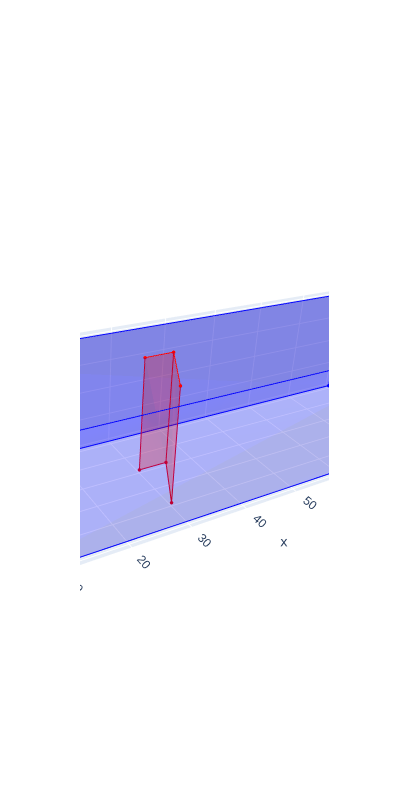

In [23]:
fig.layout.height = 800
fig.layout.width = 1000
fig.layout.scene.xaxis.range = (0, building_w * 2.2)
fig.layout.xaxis.scaleratio = 1
fig.layout.yaxis.scaleratio = 1
fig.update_scenes(xaxis_autorange="reversed")
fig